<a href="https://colab.research.google.com/github/LoyalScriptX/Food-Order-Analytics-and-Delivery-Delay-Prediction/blob/main/Food_Order_Analytics_and_Delivery_Delay_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install all required libraries for data analysis, visualization, machine learning, SQL integration, and deployment.

In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn xgboost sqlalchemy pymysql streamlit openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


Load the dataset and perform an initial inspection to identify missing values and understand the structure of the data.

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/food_orders_new_delhi.csv'  # Update with the actual file path
data = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Overview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display dataset info
print("\nDataset Info:")
print(data.info())


Dataset Overview:
   Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924    01-02-2024 01:11   
1         2       C1860         R2054    02-02-2024 22:11   
2         3       C6390         R2870    31-01-2024 05:54   
3         4       C6191         R2642    16-01-2024 22:52   
4         5       C6734         R2799    29-01-2024 01:19   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0       01-02-2024 02:39         1914             0       Credit Card   
1       02-02-2024 22:46          986            40    Digital Wallet   
2       31-01-2024 06:52          937            30  Cash on Delivery   
3       16-01-2024 23:38         1463            50  Cash on Delivery   
4       29-01-2024 02:48         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198      

Clean the dataset by handling missing values, removing duplicates, converting date columns to datetime format, and dropping rows with invalid dates.








In [ ]:
# Fill missing values: categorical with 'Unknown', numeric with 0
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna('Unknown', inplace=True)
    else:
        data[col].fillna(0, inplace=True)

# Remove duplicates
data = data.drop_duplicates()

# Convert date columns to datetime format
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'], errors='coerce')
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'], errors='coerce')

# Remove rows with invalid dates
data = data.dropna(subset=['Order Date and Time', 'Delivery Date and Time'])

print("\nCleaned Dataset:")
print(data.head())



Cleaned Dataset:
    Order ID Customer ID Restaurant ID Order Date and Time  \
0          1       C8270         R2924 2024-01-02 01:11:00   
1          2       C1860         R2054 2024-02-02 22:11:00   
8          9       C6578         R2877 2024-02-01 18:29:00   
9         10       C9322         R2161 2024-05-01 00:50:00   
10        11       C2685         R2379 2024-01-01 17:02:00   

   Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0     2024-01-02 02:39:00         1914             0       Credit Card   
1     2024-02-02 22:46:00          986            40    Digital Wallet   
8     2024-02-01 20:23:00         1663            40  Cash on Delivery   
9     2024-05-01 02:10:00          491            40    Digital Wallet   
10    2024-01-01 18:21:00          868             0  Cash on Delivery   

   Discounts and Offers  Commission Fee  Payment Processing Fee  \
0             5% on App             150                      47   
1                   10%       

<ipython-input-4-0f685017b099>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(0, inplace=True)
<ipython-input-4-0f685017b099>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col

Generate new features such as delivery time (in minutes), order weekday, order year, and order month to enhance analysis and modeling.

In [ ]:
# Create new features
data['Delivery Time (Minutes)'] = (data['Delivery Date and Time'] - data['Order Date and Time']).dt.total_seconds() / 60
data['Order Weekday'] = data['Order Date and Time'].dt.day_name()
data['Order Year'] = data['Order Date and Time'].dt.year
data['Order Month'] = data['Order Date and Time'].dt.month

print("\nData with New Features:")
print(data[['Order ID', 'Delivery Time (Minutes)', 'Order Weekday', 'Order Year', 'Order Month']].head())



Data with New Features:
    Order ID  Delivery Time (Minutes) Order Weekday  Order Year  Order Month
0          1                     88.0       Tuesday        2024            1
1          2                     35.0        Friday        2024            2
8          9                    114.0      Thursday        2024            2
9         10                     80.0     Wednesday        2024            5
10        11                     79.0        Monday        2024            1


Store the cleaned data in an SQLite database and query it to calculate the average delivery time by weekday, showcasing SQL integration for analysis.

In [ ]:
# Replace MySQL connection with SQLite
db_engine = create_engine('sqlite:///food_orders.db')

# Save data to SQLite
data.to_sql('food_orders', con=db_engine, if_exists='replace', index=False)

# Query data from SQLite
query = """
SELECT `Order Weekday`, AVG(`Delivery Time (Minutes)`) AS avg_delivery_time
FROM food_orders
GROUP BY `Order Weekday`
ORDER BY avg_delivery_time DESC;
"""
sql_results = pd.read_sql(query, con=db_engine)
print("\nAverage Delivery Time by Weekday:")
print(sql_results)



Average Delivery Time by Weekday:
  Order Weekday  avg_delivery_time
0        Monday        3034.777778
1      Thursday        2993.082192
2     Wednesday        2355.578947
3       Tuesday        1721.730769
4      Saturday        1625.277778
5        Friday        1211.184211
6        Sunday          72.400000


Visualize data to analyze delivery time distribution, payment method preferences, and average delivery time by weekday using static and interactive plots.

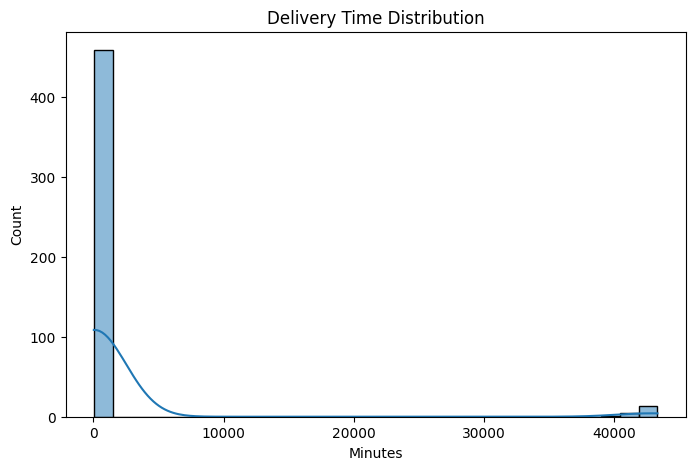

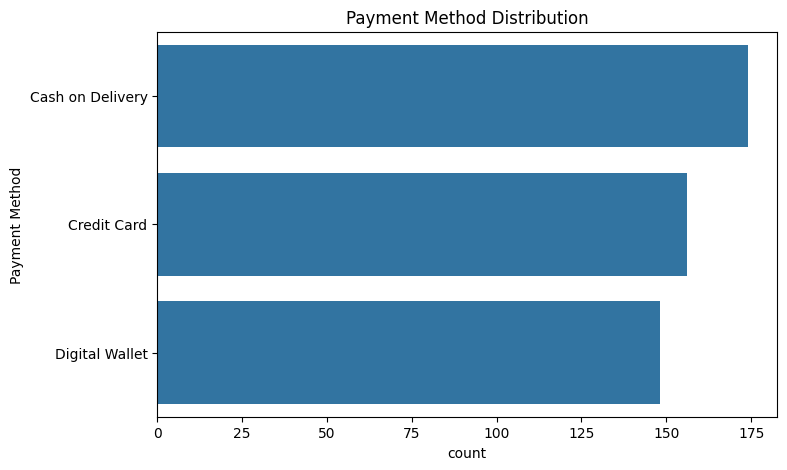

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Delivery time distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Delivery Time (Minutes)'], bins=30, kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Minutes')
plt.show()

# Payment method distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='Payment Method', data=data, order=data['Payment Method'].value_counts().index)
plt.title('Payment Method Distribution')
plt.show()

# Average delivery time by weekday (interactive)
weekday_delays = data.groupby('Order Weekday')['Delivery Time (Minutes)'].mean().reset_index()
fig = px.bar(weekday_delays, x='Order Weekday', y='Delivery Time (Minutes)', title='Average Delivery Time by Weekday')
fig.show()


Address class imbalance using SMOTE, train a Random Forest classifier to predict delivery delays, and evaluate the model's performance using accuracy and classification metrics.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Ensure no missing values in feature columns
X = data[['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee']].fillna(0)
y = data['Delayed']

# Check class distribution before resampling
print("Class Distribution Before Resampling:")
print(y.value_counts())

# Handle class imbalance using SMOTE with k_neighbors=1
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after resampling
print("Class Distribution After Resampling:")
print(pd.Series(y_resampled).value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Class Distribution Before Resampling:
Delayed
1    473
0      5
Name: count, dtype: int64
Class Distribution After Resampling:
Delayed
1    473
0    473
Name: count, dtype: int64

Model Evaluation:
Accuracy: 0.9894736842105263
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       102
           1       1.00      0.98      0.99        88

    accuracy                           0.99       190
   macro avg       0.99      0.99      0.99       190
weighted avg       0.99      0.99      0.99       190

